# <center>Anastasios Kotronis itp22104<br>DIT178 2022-2023<br>Presentation - Apache Cassandra</center>

## Apache Cassandra

<br>

Developed at Facebook and published as an open-source project in July 2008

- Distributed NoSQL database
- [Query first design](https://cassandra.apache.org/doc/latest/cassandra/data_modeling/data_modeling_rdbms.html#query-first-design) (App &rarr; Model &rarr; Data)
- Peer-to-peer communication architecture instead of Master/Slave
 - All are master nodes in communication with each other (**gossip** protocol)
- Highly scalable (Resources / Throuput scale linearly)
- Nodes organized in clusters (**rings**) 

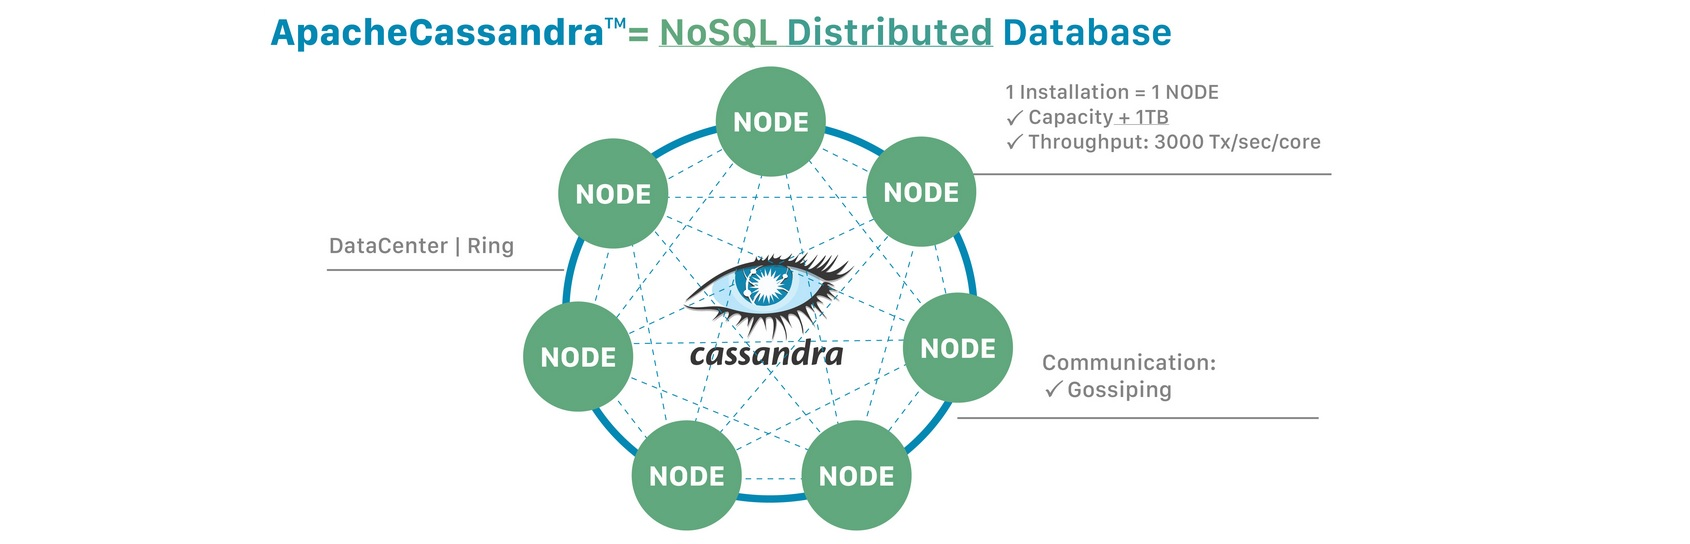

## [CAP](https://en.wikipedia.org/wiki/CAP_theorem) (AP)

- Availability, Partition Tolerance, sacrifices Conistency
- Not [ACID](https://en.wikipedia.org/wiki/ACID#Characteristics), but may be? ([ACID Transactions at scale](https://thenewstack.io/an-apache-cassandra-breakthrough-acid-transactions-at-scale/) - [ACCORD](https://cwiki.apache.org/confluence/display/CASSANDRA/CEP-15%3A+General+Purpose+Transactions))

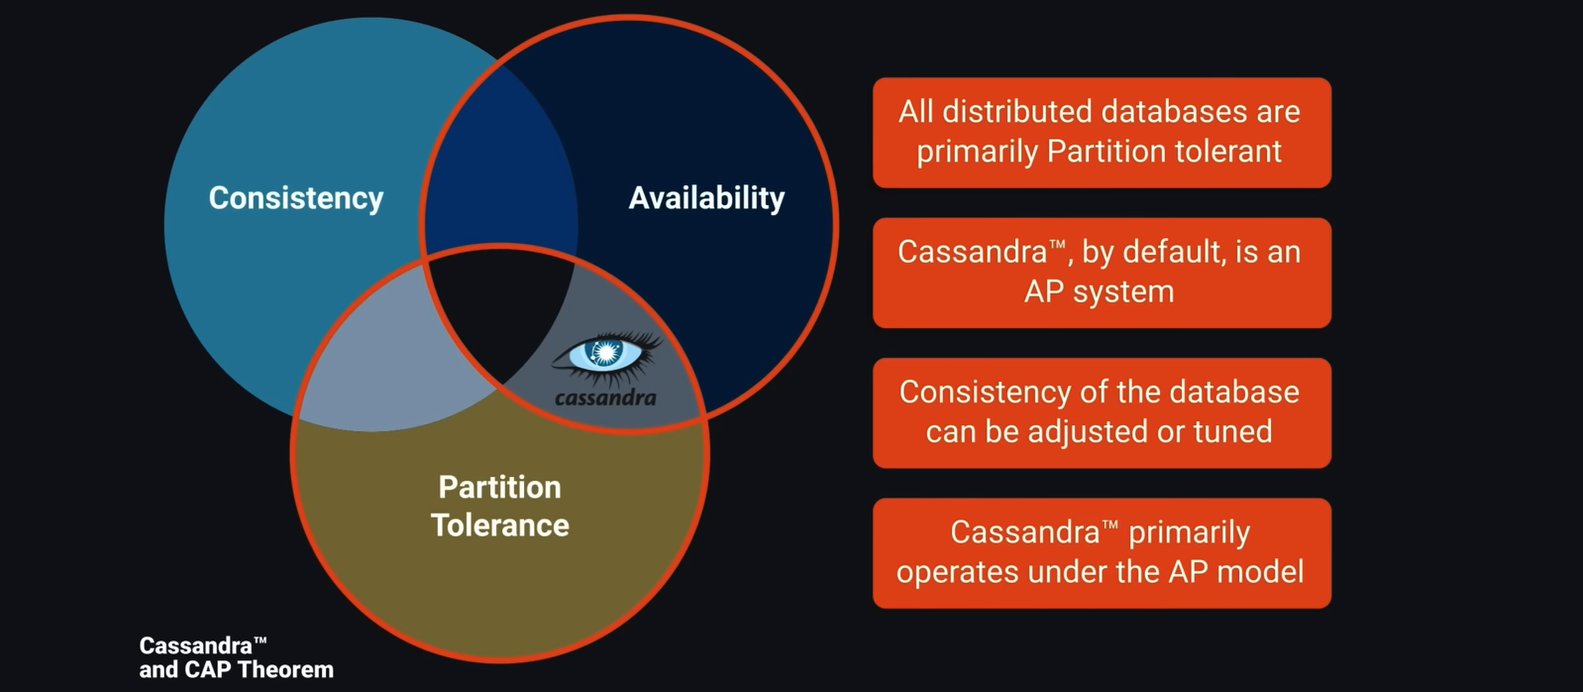

## Consistency

- Consistency Level (`CL`) configured on a per-query basis based on replication factor (`RF`)
 - E.g. `CL=QUORUM` (Majority) &rarr; Query success &hArr; `RF/2+1` replicas acknowledement
 
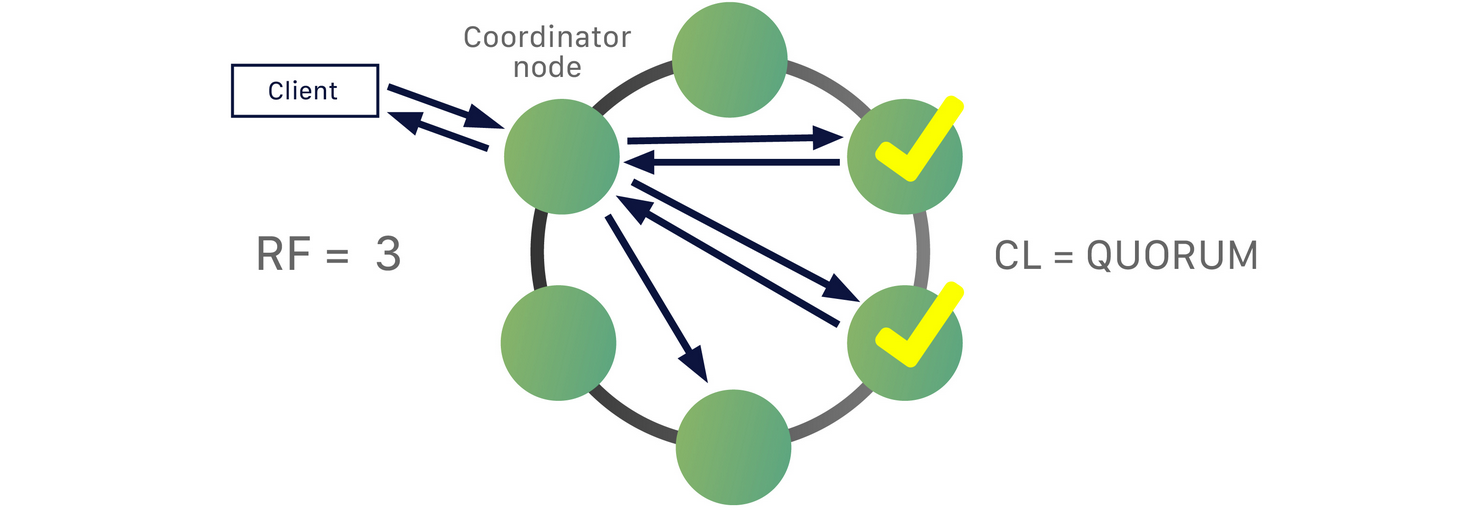

## Replication

- Data can be replicated to multiple (replica) nodes, ensuring reliability and fault tolerance
- Coordinator stores a *hint* for replicated data.
 - If a node goes down, is used to catch up to speed with the other replicas

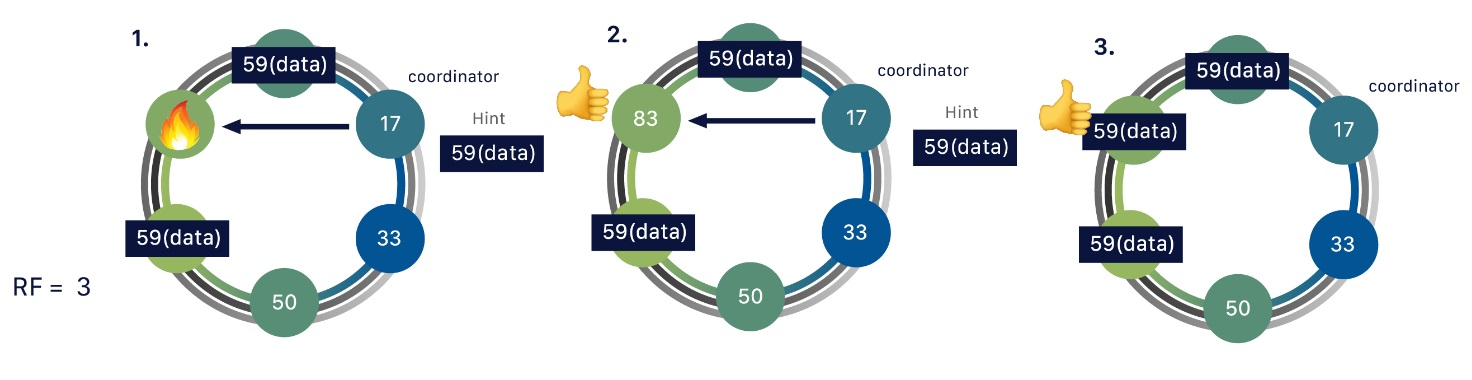

## Data Storage
<br>

- Data is automatically distributed using **partitions**
- Partitions have **keys** (single or multiple) which are hashed on data insertion
- Nodes have particular sets of tokens
- Hashed **keys** determine what node gets what data
- A **coordinator** node (can be any) inspects tokens and distributes data

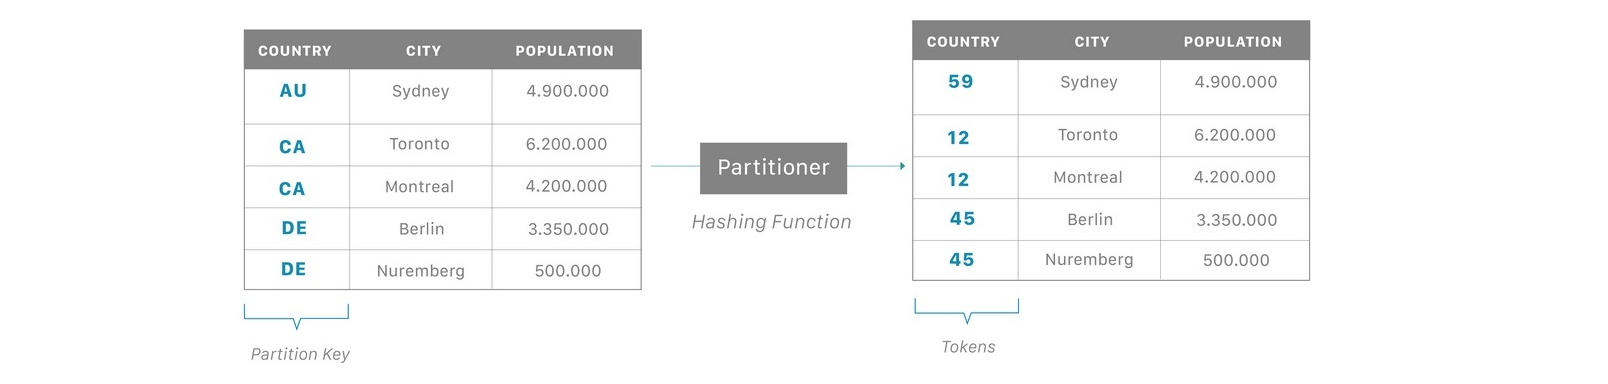

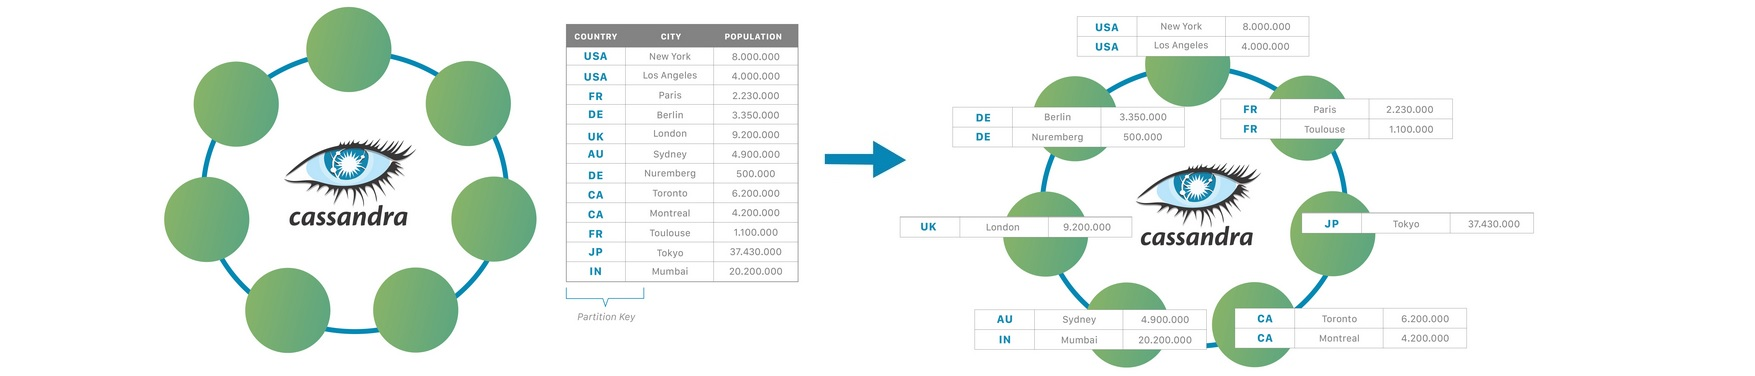

## Data Structure
<br>

- Table structure, data organized in rows and columns of specific data type
- Data is stored in rows containing columns of key-value pairs
- Tables can be
 - **2**-dimensional (each record contains exactly one row)
 - **multi**-dimensional (each record can contain one or more rows)
- Optimized for fast writes, complex reads are slower

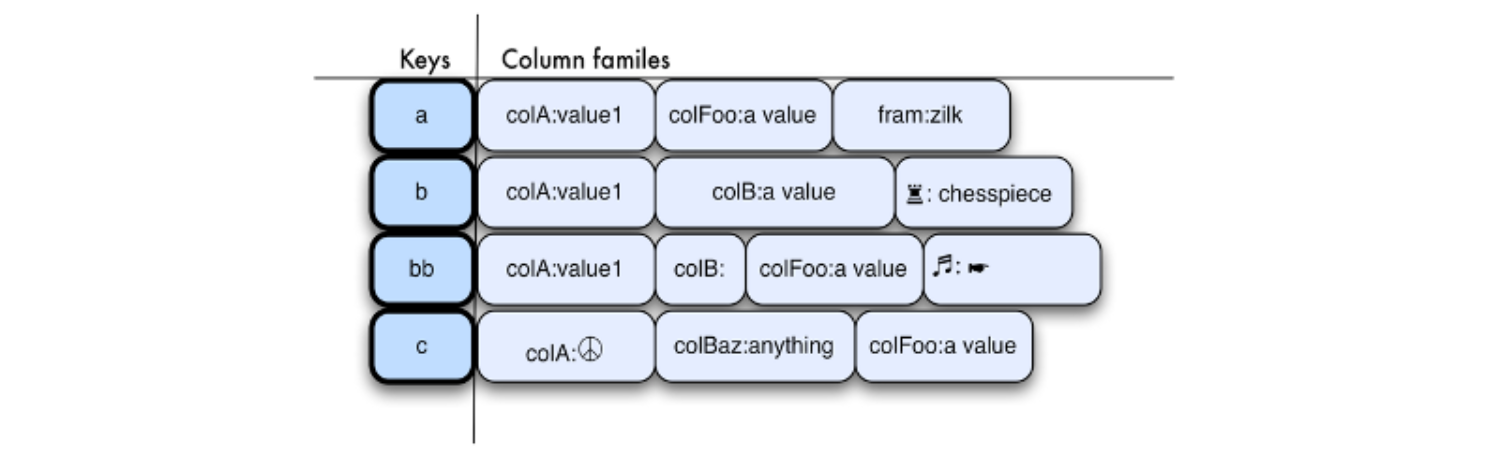

## Denormalization

- [Doesn't support](https://cassandra.apache.org/doc/latest/cassandra/data_modeling/data_modeling_rdbms.html#design-differences-between-rdbms-and-cassandra)
 - Joins
 - Cross partition transactions
 - Foreign keys or referential integrity
- Uses denormalization
 - Ensures all required informations is confined to appropriate table
- Can duplicate data in multiple tables
 - Cost efficient and allows faster retrieval

## Example

- **Video** view (comments for a particular video)
 - `video_title` &rarr; *partition key* (*simple*, may also be *composite* `(..., ...)`)
 - `comment_id` &rarr; *clustering column*
   - Helps in defining a unique row in the database for each comment
   - Define the order of data in a given partition (default *ascending*)
- **User** view (comments made by a particular user)
 - `user_login` &rarr; *partition key*
 - `comment_id` &rarr; as above

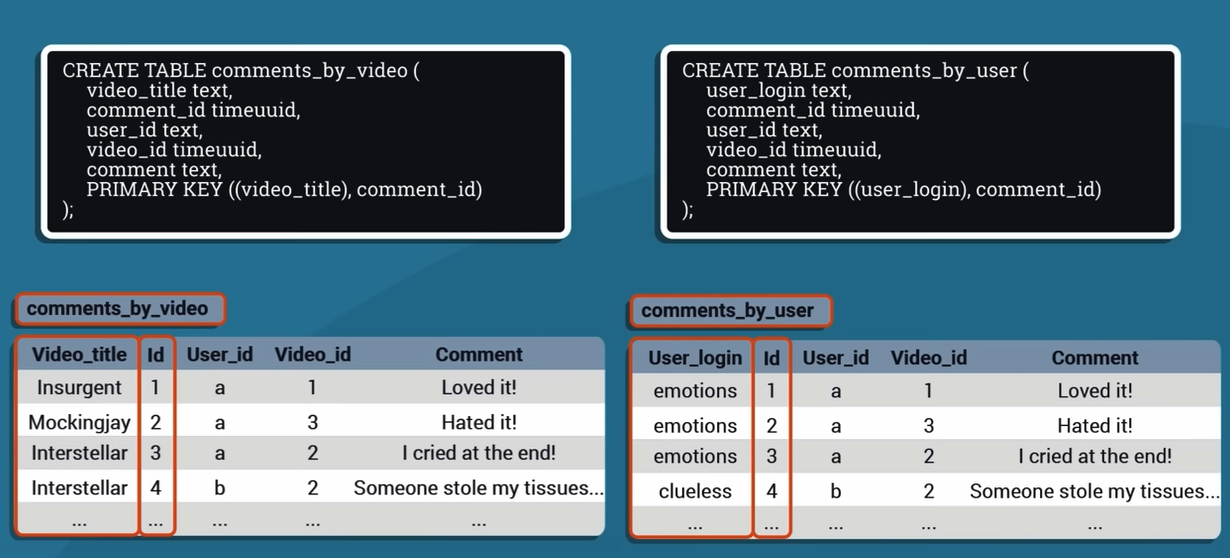

## Building Blocks - [Keyspaces](https://www.baeldung.com/cassandra-query-cheat-sheet#1-keyspace-commands)

- A top-level container to organize a related set of tables. Related to a *database* in RDBMS
- Keyspace contain tables

**Basic CQL Commands**
 - `CREATE KEYSPACE keyspace_name WITHREPLICATION={'class':'SimpleStrategy', 'replication_factor':1};`
 - `USE mykeyspace;` switches between keyspaces
 - `ALTER KEYSPACE keyspace_name`<br>`WITH REPLICATION={'class':'SimpleStrategy','replication_factor':3}`<br>`AND DURABLE_WRITES=false;`
 - `DROP KEYSPACE keyspace_name;`

## Building Blocks - [Tables/Primary Keys](https://community.datastax.com/questions/6171/index.html)
Tables contain partitions, which contain rows, which contain columns<br>
**Basic CQL Commands**<br><br>
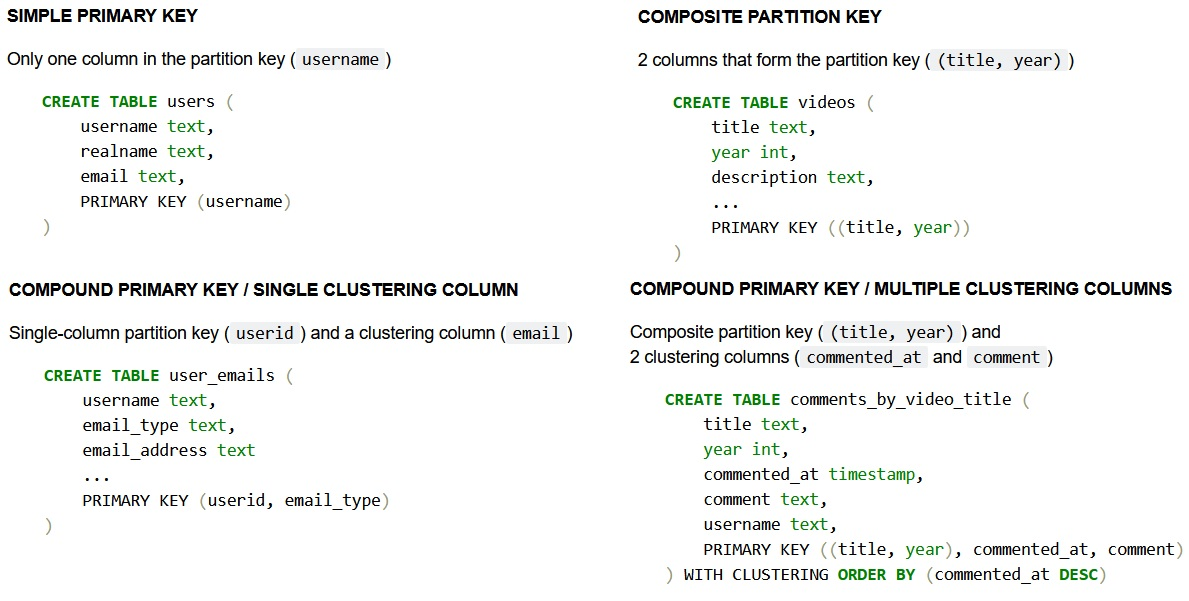

## Other CQL Commands - [Tables/Indexes]()

- `ALTER TABLE table_name ADD column_name int;` &rarr; Add table column
- `ALTER TABLE table_name WITH caching={‘keys':'NONE', 'rows_per_partition':'1'};` &rarr; Change table properties
- `DROP TABLE table_name;` &rarr; Drop table
- `TRUNCATE table_name;` &rarr; Remove table data permanently


- `CREATE INDEX index_name on table_name (column_name)`;
- `DROP INDEX IF EXISTS index_name;`

The primary key in Cassandra is already indexed. It cannot be used for the same purpose again

## Other CQL Commands

- `SELECT column_1, column_2 FROM table_name LIMIT(10)`
- `SELECT COUNT(*) FROM table_name WHERE column_name=value`
- `SELECT * FROM table_name WHERE column_name1 = value ORDER BY cloumn_name2 ASC;`
  - *Partition key* must be defined in the `WHERE` clause.
  - The `ORDER BY` clause represents the *clustering column* to use for ordering
- `INSERT INTO table_name (column_1, column_2) VALUES(value_1, value_2);`
- `UPDATE table_name SET column_2=value_2 WHERE column_1=value_1;`
- `DELETE identifier FROM table_name WHERE condition;`
- `SELECT column_name FROM table_name GROUP BY condition_1, condition_2;`
 - Only supports with *Partition Key* **or** *Partition Key* and *Clustering Key*
- `SOURCE './myscript.cql'` &rarr; execute statements from a file

## [Types](https://www.baeldung.com/cassandra-query-cheat-sheet#data-types)

- Native types &rarr; ascii, text, varchar, boolean, blob, duration, int, smallint, bigint, etc
- Collection types &rarr; Group and store data together in a column
 - *set* (unique unordered), *list* (may have duplicates, order matters), *map* (key-value pairs)
- User-defined types
```SQL
CREATE TYPE student.basic_info (
     birthday timestamp,
     race text,
     weight text,
     height text
);
 ```
- Tuples &rarr; Alternative to user defined types
```SQL
CREATE TABLE subjects (
     k int PRIMARY KEY,
     v tuple<int, text, float>
);
INSERT INTO subjects  (k, v) VALUES(0, (3, 'cs', 2.1));
 ```

## [Usage with Docker 1/3](https://cassandra.apache.org/_/quickstart.html)

- Pull latest image:
 - `docker pull cassandra:latest`
- Create network to access container ports
 - `docker network create cassandra`
- Create container
 - `docker run --rm -d --name cassandra --hostname cassandra --network cassandra cassandra`

## [Usage with Docker 2/3](https://cassandra.apache.org/_/quickstart.html)

- Create `data.cql` with contents
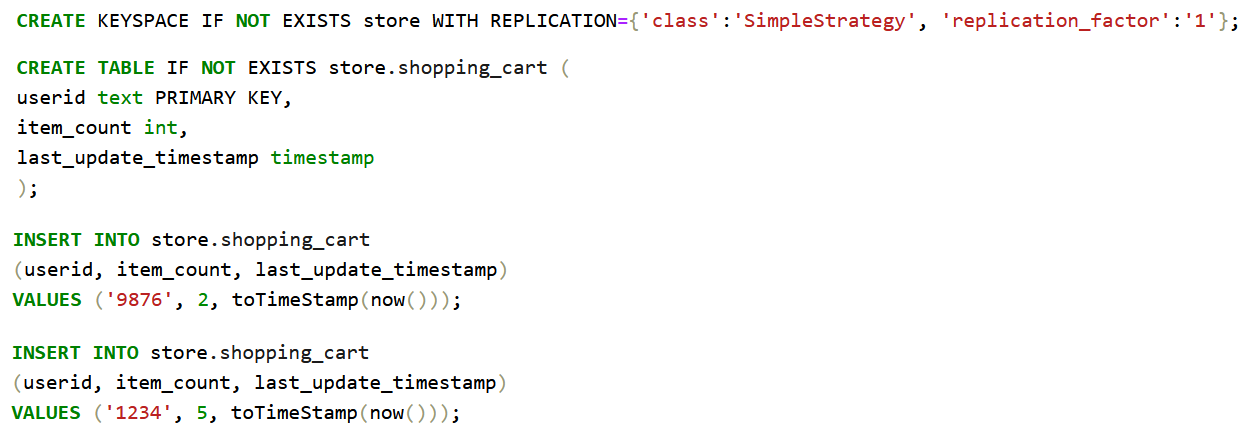

## [Usage with Docker 3/3](https://cassandra.apache.org/_/quickstart.html)

- Load data with *CQL shell*
 - `docker run --rm --network cassandra -v "$(pwd)/data.cql:/scripts/data.cql" -e CQLSH_HOST=cassandra -e CQLSH_PORT=9042 -e CQLVERSION=3.4.5 nuvo/docker-cqlsh`
- Read data
 - `SELECT * FROM store.shopping_cart;`
- Write data
 - `INSERT INTO store.shopping_cart (userid, item_count) VALUES ('4567', 20);`
- Kill container
 - `docker kill cassandra`
- Remove network
 - `docker network rm cassandra`

## References

- Apache Cassandra FreeCodeCamp
 - https://www.youtube.com/watch?v=J-cSy5MeMOA
- Official Documentation
 - https://cassandra.apache.org/_/index.html
- pandaforme Gitbook
 - https://pandaforme.gitbooks.io/introduction-to-cassandra/content/index.html
- Cassandra vs MongoDB - knowledgehut
 - https://www.knowledgehut.com/blog/data-science/cassandra-vs-mongodb
- Apache Cassandra Cheat Sheet
 - https://www.baeldung.com/cassandra-query-cheat-sheet#data-types